## FT-IMS Processing

This notebook provides an example of how an arrival time distribution is reconstructed from mass-extracted time-domain signal for tetraoctylammonium. Accompanying .csv file containing example time domain data is found within the same GitHub repository.

In [1]:
#required package imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

In [2]:
#importing data, example .csv should be in the same repository
time, signal = np.loadtxt('T8A_data.csv', delimiter=',', unpack=True)

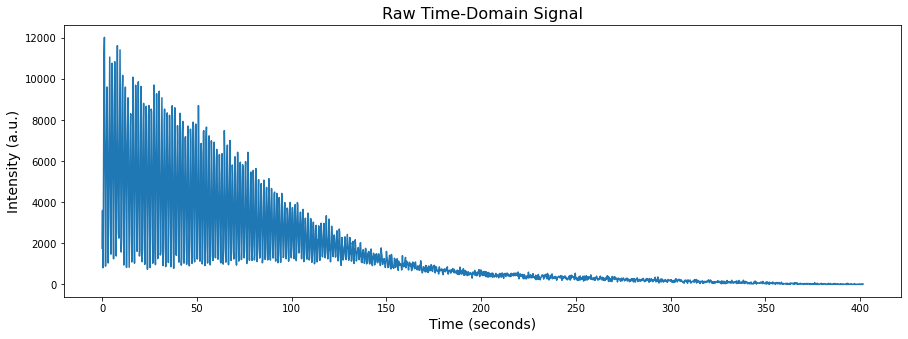

In [3]:
#plotting raw data
plt.figure(figsize=[15,5])
plt.plot(time, signal)
plt.title('Raw Time-Domain Signal', fontsize=16)
plt.xlabel('Time (seconds)', fontsize=14)
plt.ylabel('Intensity (a.u.)', fontsize=14);

In [4]:
#creating variable for number of points in original data
nPts = len(time)

In [5]:
#creating evenly spaced time axis vector, must be same number of points as original data
time_new = np.linspace(time[0], time[-1], nPts)

In [6]:
#created spline object to be evaluated at evenly spaced time vector
#spline arguments require zero smoothing (s=0) and linear interpolation (k=1)
spln = UnivariateSpline(time, signal, s=0, k=1)

In [7]:
#evaluating spline to create matching evenly spaced intensity vector
signal_new = spln(time_new)

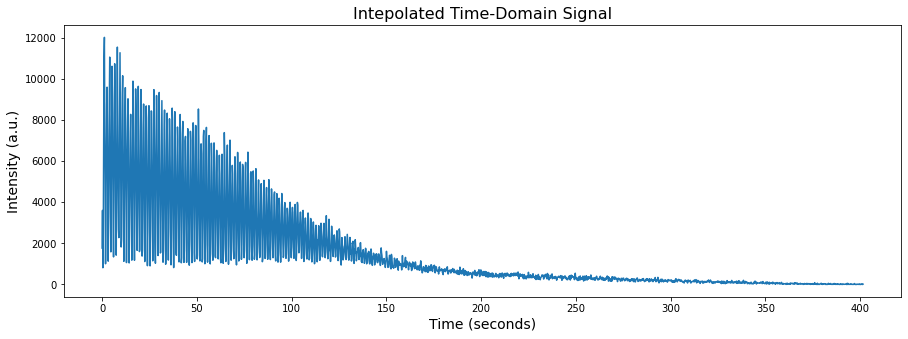

In [8]:
#plotting the results of the spline
plt.figure(figsize=[15,5])
plt.plot(time_new, signal_new)
plt.title('Intepolated Time-Domain Signal', fontsize=16)
plt.xlabel('Time (seconds)', fontsize=14)
plt.ylabel('Intensity (a.u.)', fontsize=14);

In [9]:
#normalization factor
normFac = 2/nPts

In [10]:
#variable to FFT results in half (due to mirrored output)
N = int(nPts/2)

In [11]:
#creating new frequency axis
xf = np.fft.fftfreq(nPts, np.diff(time_new).mean())
Freq = xf[:N]

In [12]:
#Fourier transform
yf = np.fft.fft(signal_new)
Amplitude = (np.abs(yf[:N]) * normFac)**2

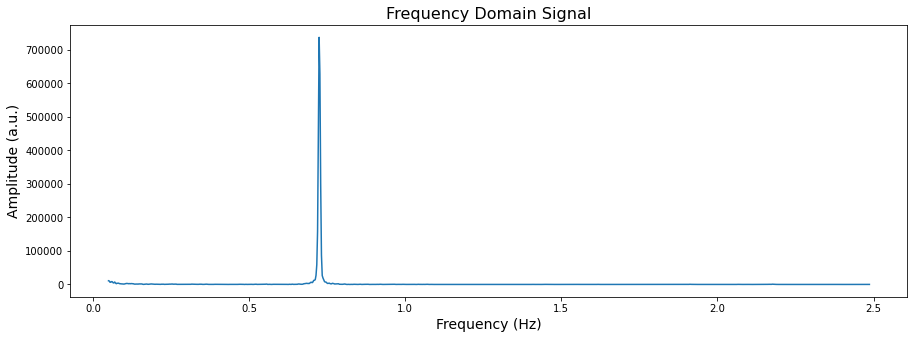

In [13]:
#plotting frequency domain signal
plt.figure(figsize=[15,5])
plt.plot(Freq[20:], Amplitude[20:]) #slicing to avoid usual giant peak at start
plt.title('Frequency Domain Signal', fontsize=16)
plt.xlabel('Frequency (Hz)', fontsize=14)
plt.ylabel('Amplitude (a.u.)', fontsize=14);

In [14]:
#sweep rate needed to divide frequency axis by
#example data sweep is from 5 Hz to 8005 Hz
sweep_rate = 8000/time[-1]
sweep_rate

19.923290351324813

In [15]:
#new time axis
ATD_time = (Freq/sweep_rate)*1000

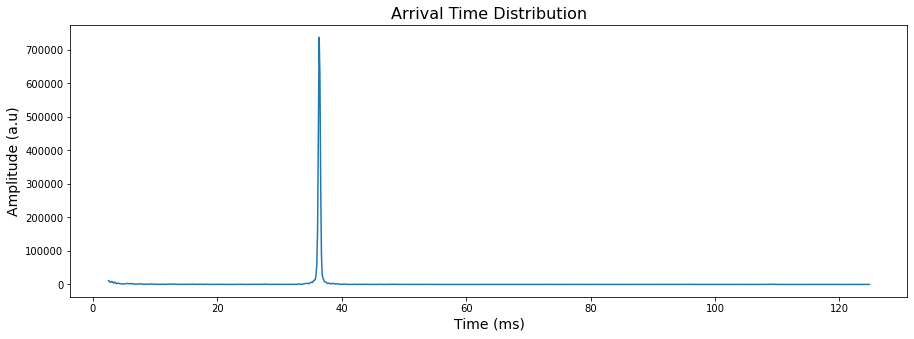

In [16]:
#plotting arrival time distribution
plt.figure(figsize=[15,5])
plt.plot(ATD_time[20:], Amplitude[20:])
plt.title('Arrival Time Distribution', fontsize=16)
plt.xlabel('Time (ms)', fontsize=14)
plt.ylabel('Amplitude (a.u)', fontsize=14);